# COMP3010J - Machine Learning

## Yuyang Wang 19206226

# Install Necessary packages

In [4]:
!pip install pandas numpy matplotlib seaborn sklearn

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


# Git operations utils

In [22]:
!git add .
!git commit -m "update"
!git push

[master 43c9bdb] update
 1 file changed, 721 insertions(+), 210 deletions(-)
Enumerating objects: 7, done.
Counting objects: 100% (7/7), done.
Delta compression using up to 4 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 29.27 KiB | 5.85 MiB/s, done.
Total 4 (delta 3), reused 0 (delta 0), pack-reused 0
remote: . Processing 1 references
remote: Processed 1 references in total
To ssh://git.echo.cool:2232/wyy/ML_Lab.git
   53dd4e3..43c9bdb  master -> master


# Import Necessary packages

In [106]:
# data analysis and preparing
import pandas as pd
import math
import numpy as np
import random as rnd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
# from tqdm import tqdm

# tqdm.pandas()

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics, tree
from sklearn.metrics import auc, roc_curve, confusion_matrix, f1_score

# Read data file

In [107]:
df = pd.read_csv('kickstarter201801.csv')

In [108]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_realised at deadline,usd_goal_real_at_start
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,09/10/2015,1000.0,11/08/2015 12:12,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,01/11/2017,30000.0,02/09/2017 04:43,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,26/02/2013,45000.0,12/01/2013 00:20,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,16/04/2012,5000.0,17/03/2012 03:24,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,29/08/2015,19500.0,04/07/2015 08:35,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   ID                                378661 non-null  int64  
 1   name                              378657 non-null  object 
 2   category                          378661 non-null  object 
 3   main_category                     378661 non-null  object 
 4   currency                          378661 non-null  object 
 5   deadline                          378661 non-null  object 
 6   goal                              378661 non-null  float64
 7   launched                          378661 non-null  object 
 8   pledged                           378661 non-null  float64
 9   state                             378661 non-null  object 
 10  backers                           378661 non-null  int64  
 11  country                           378661 non-null  o

# Overview of our target feature

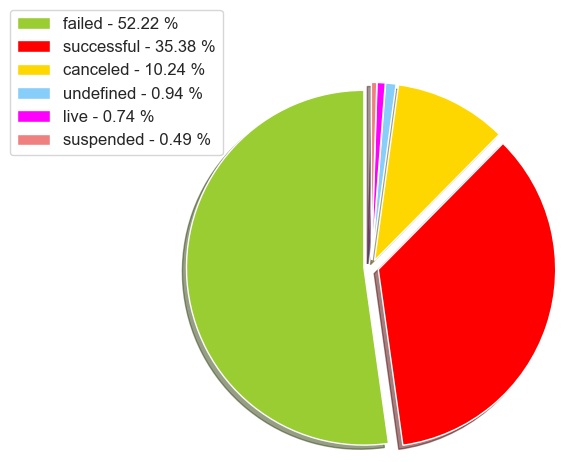

In [110]:
state_value_counts = df['state'].value_counts()
x = np.char.array([str(i) for i in state_value_counts.index])
y = np.array(state_value_counts.values)
colors = ['yellowgreen', 'red', 'gold', 'lightskyblue', 'magenta', 'lightcoral', 'blue', 'pink', 'darkgreen', 'yellow',
          'grey', 'violet', 'white', 'cyan'][:len(state_value_counts.index)]
explode = [0.05] * len(state_value_counts.index)
porcent = 100. * y / y.sum()

patches, texts = plt.pie(y, colors=colors, startangle=90, radius=1.2, shadow=True,
                         wedgeprops={'linewidth': 1, 'linestyle': 'solid', 'antialiased': True}, explode=explode)
labels = ['{0} - {1:1.2f} %'.format(i, j) for i, j in zip(x, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy = zip(*sorted(zip(patches, labels, y),
                                         key=lambda x: x[2],
                                         reverse=True))

plt.legend(patches, labels, loc='center left', bbox_to_anchor=(-0.5, 1.),
           fontsize=12)

plt.show()

# Unbalance data

# Check null values

In [111]:
df.isnull().sum()

ID                                     0
name                                   4
category                               0
main_category                          0
currency                               0
deadline                               0
goal                                   0
launched                               0
pledged                                0
state                                  0
backers                                0
country                                0
usd pledged                         3797
usd_pledged_realised at deadline       0
usd_goal_real_at_start                 0
dtype: int64

# Drop ID and name, since they are unique value for each one.

In [112]:
df = df.drop(["ID", "name"], axis=1)

# Dealing with missing data

In [113]:
df['usd pledged'].fillna(method='pad', inplace=True)
# Removing the four NA record from our dataset
df.dropna(axis=0, inplace=True)
df.isnull().sum()

category                            0
main_category                       0
currency                            0
deadline                            0
goal                                0
launched                            0
pledged                             0
state                               0
backers                             0
country                             0
usd pledged                         0
usd_pledged_realised at deadline    0
usd_goal_real_at_start              0
dtype: int64

# Add duration field

In [114]:
df["duration"] = (pd.to_datetime(df.deadline, format="%d/%m/%Y") - pd.to_datetime(df.launched,
                                                                                  format="%d/%m/%Y %H:%M")).apply(
    lambda x: x.days)
df["duration"]

0         58
1         59
2         44
3         29
4         55
          ..
378656    29
378657    26
378658    45
378659    30
378660    27
Name: duration, Length: 378661, dtype: int64

# Add completeRatio field

In [115]:
df["completeRatio"] = df['usd_pledged_realised at deadline'] / df['usd_goal_real_at_start']
df["completeRatio"]

0         0.000000
1         0.080700
2         0.004889
3         0.000200
4         0.065795
            ...   
378656    0.000500
378657    0.103333
378658    0.001333
378659    0.013333
378660    0.262000
Name: completeRatio, Length: 378661, dtype: float64

In [116]:
# Drop Date
df = df.drop(["deadline", "launched"], axis=1)
df = df.drop(['pledged', 'goal'],axis=1)

In [117]:
df.head()

,category,main_category,currency,state,backers,country,usd pledged,usd_pledged_realised at deadline,usd_goal_real_at_start,duration,completeRatio
0,Poetry,Publishing,GBP,failed,0,GB,0.0,0.0,1533.95,58,0.000000
1,Narrative Film,Film & Video,USD,failed,15,US,100.0,2421.0,30000.00,59,0.080700
2,Narrative Film,Film & Video,USD,failed,3,US,220.0,220.0,45000.00,44,0.004889
3,Music,Music,USD,failed,1,US,1.0,1.0,5000.00,29,0.000200
4,Film & Video,Film & Video,USD,canceled,14,US,1283.0,1283.0,19500.00,55,0.065795


# Transform Category

In [118]:
categoryTransformTable = {}
categorySet = set(df['category'])
for index, i in enumerate(categorySet):
    categoryTransformTable[i] = index

stateTransformTable = {}
stateSet = set(df['state'])
for index, i in enumerate(stateSet):
    stateTransformTable[i] = index
#
currencyTransformTable = {}
currencySet = set(df['currency'])
for index, i in enumerate(currencySet):
    currencyTransformTable[i] = index

countryTransformTable = {}
countrySet = set(df['country'])
for index, i in enumerate(countrySet):
    countryTransformTable[i] = index

main_categoryTransformTable = {}
main_categorySet = set(df['main_category'])
for index, i in enumerate(main_categorySet):
    main_categoryTransformTable[i] = index

num_encode = {
    'state': stateTransformTable,
    'category': categoryTransformTable,
    'currency': currencyTransformTable,
    'country': countryTransformTable,
    'main_category': main_categoryTransformTable,
}
# Do Transformation
df.replace(num_encode, inplace=True)

# One-hot vector conversion (Depercated)

In [119]:
# main_category = pd.get_dummies(df['main_category'], prefix='main_category')
# category = pd.get_dummies(df['category'], prefix='category')
# currency = pd.get_dummies(df['currency'], prefix='currency')
# country = pd.get_dummies(df['category'], prefix='country')
#
# df = pd.concat([df, main_category, category, currency, country], axis=1)
# df = df.drop(['main_category', 'category', 'currency', 'country'], axis=1)

In [120]:
df.head()

,category,main_category,currency,state,backers,country,usd pledged,usd_pledged_realised at deadline,usd_goal_real_at_start,duration,completeRatio
0,76,7,6,3,0,2,0.0,0.0,1533.95,58,0.000000
1,71,8,10,3,15,12,100.0,2421.0,30000.00,59,0.080700
2,71,8,10,3,3,12,220.0,220.0,45000.00,44,0.004889
3,21,1,10,3,1,12,1.0,1.0,5000.00,29,0.000200
4,92,8,10,1,14,12,1283.0,1283.0,19500.00,55,0.065795


# Normalize data

In [121]:
normalized_df=(df-df.min())/(df.max()-df.min())

In [122]:
normalized_df.head()

,category,main_category,currency,state,backers,country,usd pledged,usd_pledged_realised at deadline,usd_goal_real_at_start,duration,completeRatio
0,0.481013,0.500000,0.461538,0.6,0.000000,0.090909,0.000000e+00,0.000000e+00,0.000009,0.003465,0.000000e+00
1,0.449367,0.571429,0.769231,0.6,0.000068,0.545455,4.916666e-06,1.190325e-04,0.000180,0.003525,7.738937e-07
2,0.449367,0.571429,0.769231,0.6,0.000014,0.545455,1.081666e-05,1.081666e-05,0.000270,0.002629,4.688327e-08
3,0.132911,0.071429,0.769231,0.6,0.000005,0.545455,4.916666e-08,4.916666e-08,0.000030,0.001733,1.917952e-09
4,0.582278,0.571429,0.769231,0.2,0.000064,0.545455,6.308082e-05,6.308082e-05,0.000117,0.003286,6.309571e-07


# Check Whether I need to use Different types of distance metric for KNN model

The function named `myDisFunc` applies hamming distance for categorical features and applies euclidean for continuous features.

Due to performance issue, I only sampled 1000 samples (`df.sample(1000)`) for testing in this section.

Full dataset will be used in the next section.

In [123]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import DistanceMetric
# Split data into training, validation and test sets
train, test = train_test_split(df.sample(1000), test_size=0.3)
train, val = train_test_split(train, test_size=0.3)

print(f"Testing Model {KNeighborsClassifier.__name__}")
X_train, X_test = train.drop(["state"], axis=1), test.drop(["state"], axis=1)
y_train, y_test = train['state'], test['state']
neighbor_size = [3, 5, 7, 9, 11, 13]
# neighbor_size = [3,]

Hdist = DistanceMetric.get_metric('hamming')
def myDisFunc(x, y):
    categoricalDistance = Hdist.pairwise([[x[0], x[1], x[2], x[4]], [y[0], y[1], y[2], y[4]]])[0][1]
    continueousDistanceSquare = np.sum(
        ( np.array([x[3]] + x[5:]) - np.array([y[3]] + y[5:]) )
        **2)
    return math.sqrt(categoricalDistance + continueousDistanceSquare)

metricNames = [myDisFunc, "euclidean", "manhattan", "chebyshev"]
result = {}

for k in metricNames:
    result[k] = {}
    for neighbors in neighbor_size:
        print(f"Testing <metric: {k}, neighborSize: {neighbors}>: ", end="")
        knn = KNeighborsClassifier(n_neighbors=neighbors, metric=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, y_pred)
        f1 = f1_score(y_true=y_test, y_pred=y_pred, average="macro")
        print(f"Result: Accuracy {accuracy}, F1 {f1}")
        result[k][neighbors] = {
            "Accuracy": accuracy,
            "F1": f1
        }

Testing Model KNeighborsClassifier
Testing <metric: <function myDisFunc at 0x142112ee0>, neighborSize: 3>: 

ValueError: Unknown label type: 'continuous'

# From the graph we can know that...

The use of different distance metric for continuous feature and categorical feature has marginal effect on the overall performance. So, for the full dataset, I will use different distance metric to test the model without applying different distance metric for continuous feature and categorical feature.


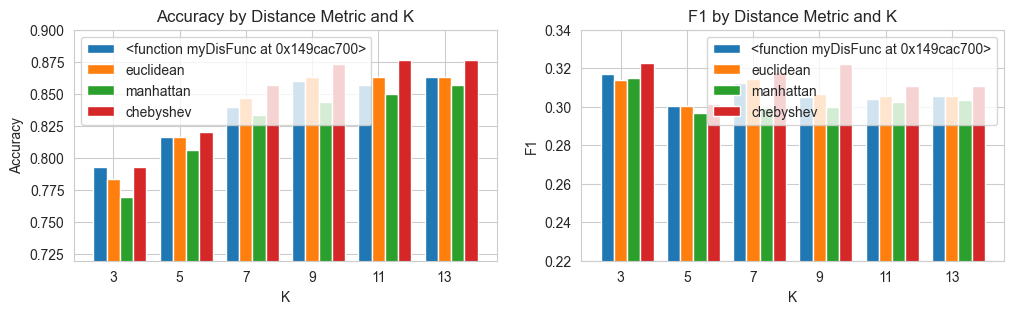

In [95]:
f = plt.figure(figsize=(12,3))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

labels = neighbor_size
width = 0.2  # the width of the bars
x = np.arange(len(labels))  # the label locations
for index, metricName in enumerate(result):
    neighborResult = result[metricName]
    rect = ax1.bar(x - width + (width) * (index), [neighborResult[i]['Accuracy'] for i in neighborResult], width, label=metricName)
# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('K')
ax1.set_title('Accuracy by Distance Metric and K')
ax1.set_xticks(x, labels)
ax1.set_ylim([0.72, 0.9])
ax1.legend()

labels = neighbor_size
width = 0.2  # the width of the bars
x = np.arange(len(labels))  # the label locations
for index, metricName in enumerate(result):
    neighborResult = result[metricName]
    rect = ax2.bar(x - width + (width) * (index), [neighborResult[i]['F1'] for i in neighborResult], width, label=metricName)
# Add some text for labels, title and custom x-axis tick labels, etc.
ax2.set_ylabel('F1')
ax2.set_xlabel('K')
ax2.set_title('F1 by Distance Metric and K')
ax2.set_xticks(x, labels)
ax2.set_ylim([0.22, 0.34])
ax2.legend()


plt.show()

# KNN model

In [101]:
# Split data into training, validation and test sets
train, test = train_test_split(df, test_size=0.3)
train, val = train_test_split(train, test_size=0.3)

In [84]:
from sklearn.neighbors import KNeighborsClassifier
print(f"Testing Model {KNeighborsClassifier.__name__}")
X_train, X_test = train.drop(["state"], axis=1), test.drop(["state"], axis=1)
y_train, y_test = train['state'], test['state']
neighbor_size = [3, 5, 7, 9, 11, 13]

metricNames = ["euclidean", "manhattan", "chebyshev"]
result = {}

for k in metricNames:
    result[k] = {}
    for neighbors in neighbor_size:
        print(f"Testing <metric: {k}, neighborSize: {neighbors}>: ", end="")
        knn = KNeighborsClassifier(n_neighbors=neighbors, metric=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, y_pred)
        f1 = f1_score(y_true=y_test, y_pred=y_pred, average="macro")
        print(f"Result: Accuracy {accuracy}, F1 {f1}")
        result[k][neighbors] = {
            "Accuracy": accuracy,
            "F1": f1
        }

Testing Model KNeighborsClassifier
Testing <metric: euclidean, neighborSize: 3>: Result: Accuracy 0.8442944040000352, F1 0.430950489591788
Testing <metric: euclidean, neighborSize: 5>: Result: Accuracy 0.8600163733835685, F1 0.4195834600380919
Testing <metric: euclidean, neighborSize: 7>: Result: Accuracy 0.8666185441773255, F1 0.4092334058359021
Testing <metric: euclidean, neighborSize: 9>: Result: Accuracy 0.8700780816732542, F1 0.4030977411532213
Testing <metric: euclidean, neighborSize: 11>: Result: Accuracy 0.8723756371094816, F1 0.39790842152743205
Testing <metric: euclidean, neighborSize: 13>: Result: Accuracy 0.8737576915289748, F1 0.39608635624248567
Testing <metric: manhattan, neighborSize: 3>: Result: Accuracy 0.8455092034260865, F1 0.4421073909683942
Testing <metric: manhattan, neighborSize: 5>: Result: Accuracy 0.8604125036311939, F1 0.4300051644895775
Testing <metric: manhattan, neighborSize: 7>: Result: Accuracy 0.8665041065502337, F1 0.4184009239291819
Testing <metric: 

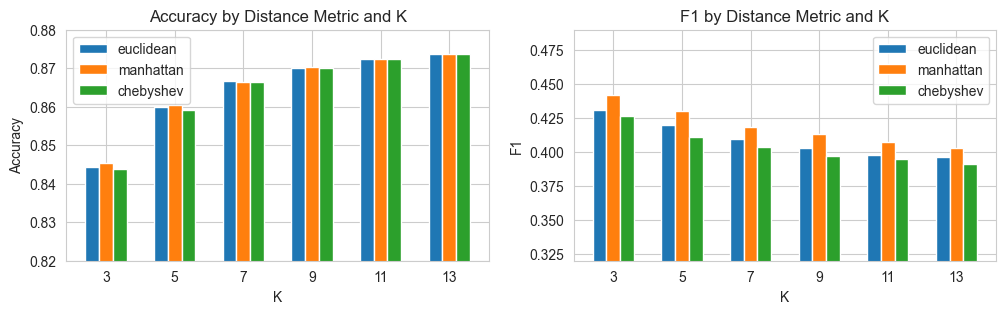

In [85]:
f = plt.figure(figsize=(12,3))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

labels = neighbor_size
width = 0.2  # the width of the bars
x = np.arange(len(labels))  # the label locations
for index, metricName in enumerate(result):
    neighborResult = result[metricName]
    rect = ax1.bar(x - width + (width) * (index), [neighborResult[i]['Accuracy'] for i in neighborResult], width, label=metricName)
# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('K')
ax1.set_title('Accuracy by Distance Metric and K')
ax1.set_xticks(x, labels)
ax1.set_ylim([0.82, 0.88])
ax1.legend()

labels = neighbor_size
width = 0.2  # the width of the bars
x = np.arange(len(labels))  # the label locations
for index, metricName in enumerate(result):
    neighborResult = result[metricName]
    rect = ax2.bar(x - width + (width) * (index), [neighborResult[i]['F1'] for i in neighborResult], width, label=metricName)
# Add some text for labels, title and custom x-axis tick labels, etc.
ax2.set_ylabel('F1')
ax2.set_xlabel('K')
ax2.set_title('F1 by Distance Metric and K')
ax2.set_xticks(x, labels)
ax2.set_ylim([0.32, 0.49])
ax2.legend()
plt.show()

,category,main_category,currency,state,backers,country,usd pledged,usd_pledged_realised at deadline,usd_goal_real_at_start,duration,completeRatio
105352,154,7,10,3,13,12,605.0,605.00,2500.00,13,0.242000
91124,24,6,10,3,0,12,0.0,0.00,35000.00,19,0.000000
288907,35,12,9,1,0,6,0.0,0.00,11764.98,29,0.000000
268837,66,8,10,1,0,12,0.0,0.00,2500.00,40,0.000000
321888,126,0,10,1,26,12,1337.0,1337.00,8000.00,34,0.167125
...,...,...,...,...,...,...,...,...,...,...,...
226081,137,2,10,2,562,12,8344.0,36872.66,18000.00,29,2.048481
10129,10,1,10,3,1,12,10.0,10.00,1500.00,59,0.006667
243506,129,2,10,2,25,12,960.0,960.00,750.00,3,1.280000
325568,65,1,10,2,54,12,3466.0,3466.00,3400.00,29,1.019412


In [98]:
from sklearn.naive_bayes import GaussianNB

print(f"Testing Model {GaussianNB.__name__}")
X_train, X_test = train.drop(["state"], axis=1), test.drop(["state"], axis=1)
y_train, y_test = train['state'], test['state']
metricValue = range(1, 10)
result = {}

for k in metricValue:
    result[k] = {}
    print(f"Testing <metric: {k}>: ", end="")
    knn = GaussianNB(var_smoothing=k*1e-9)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    f1 = f1_score(y_true=y_test, y_pred=y_pred, average="macro")
    print(f"Result: Accuracy {accuracy}, F1 {f1}")
    result[k][0] = {
        "Accuracy": accuracy,
        "F1": f1
    }

Testing Model GaussianNB
Testing <metric: 1>: Result: Accuracy 0.30843581369554307, F1 0.14590358684363433
Testing <metric: 2>: Result: Accuracy 0.3077491879329924, F1 0.14817353705420747
Testing <metric: 3>: Result: Accuracy 0.306155864048099, F1 0.14838125834060928
Testing <metric: 4>: Result: Accuracy 0.305557267229465, F1 0.1485923972472762
Testing <metric: 5>: Result: Accuracy 0.3053988151304149, F1 0.1487638934990417
Testing <metric: 6>: Result: Accuracy 0.30545163249676494, F1 0.1488184981065837
Testing <metric: 7>: Result: Accuracy 0.30547804117994, F1 0.14903671353262107
Testing <metric: 8>: Result: Accuracy 0.30541642091919824, F1 0.14902751156232819
Testing <metric: 9>: Result: Accuracy 0.30537240644723984, F1 0.14910504150796763
